# Group 10: Mental Health & Lifestyle


# Project Introduction

**Github Project Link:**

https://github.com/cs418-fa24/project-check-in-team-10

**Modeling Mental Health & Lifestyle Choice**\
This project explores the relationships between lifestyle choices and their significant impact on individuals' overall mental health. Our team believes that this is an important investigation, with the potential to provide actionable insights and support informed decisions that promote mental well-being. We analyze data from the 2023 Behavioral Risk Factor Surveillance System (BRFSS) which includes over 430,000 participants across the U.S. This survey data contains health related behaviors and outcomes from various factors.
Our primary research question is **How do lifestyle choices and circumstances impact self-reported mental health?**. We are interested in identifying patterns that reveal whether engaging in a healthier lifestyle correlates with better mental health outcomes, against the number of days per month respondents report experiencing poor mental health. To answer our question, we explore the potential cases and relationships between these factors accounting for demographic factors: age, education, and income. We hope to generate insights that not only support individual decision-making but also inform public health recommendations, ultimately promoting wellness through positive lifestyle changes.

# Data Introduction and Summary

As discussed in the introduction, out data was sourced from the CDC's BRFSS, with 430,000 participants and over 350 features. With a plethora of features and missing data, we implemented these steps:
* Narrow down the features from 350 to 19
* Impute null values based on:
    - Randomly sampling from an observed distribution
    - Remove rows of columns for which there are less than 10,000 null values

# TBD: If theres room we add a thing with maybe one chart showing the distribution imputation charts

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [3]:
pd.read_csv("imputed_data.csv")

_STATE  GENHLTH  PHYSHLTH  MENTHLTH  DIABETE4  MARITAL  EDUCA  \
0          1.0      2.0       0.0       0.0       1.0      1.0    5.0   
1          1.0      2.0       0.0       0.0       3.0      2.0    5.0   
2          1.0      4.0       6.0       2.0       3.0      3.0    4.0   
3          1.0      2.0       2.0       0.0       3.0      1.0    5.0   
4          1.0      4.0       0.0       0.0       1.0      3.0    5.0   
...        ...      ...       ...       ...       ...      ...    ...   
392510    78.0      3.0      12.0      30.0       3.0      2.0    5.0   
392511    78.0      2.0       0.0       0.0       3.0      5.0    6.0   
392512    78.0      2.0      10.0       0.0       3.0      1.0    6.0   
392513    78.0      3.0       0.0       0.0       1.0      5.0    6.0   
392514    78.0      5.0       2.0       0.0       3.0      5.0    2.0   

        EMPLOY1  INCOME3  FLUSHOT7  HIVTST7  _HLTHPL1  _TOTINDA  _RACEGR3  \
0           7.0      9.0       2.0      2.0       1.0       2.0       1.0   
1           7.0      9.0       1.0      2.0       1.0       1.0       1.0   
2           7.0      2.0       1.0      2.0       1.0       1.0       2.0   
3           7.0      9.0       1.0      1.0       1.0       1.0       1.0   
4           8.0      7.0       2.0      2.0       1.0       1.0       1.0   
...         ...      ...       ...      ...       ...       ...       ...   
392510      1.0      5.0       2.0      1.0       1.0       1.0       2.0   
392511      1.0      6.0       2.0      1.0       1.0       2.0       2.0   
392512      1.0     10.0       1.0      1.0       1.0       1.0       5.0   
392513      4.0      3.0       2.0      2.0       1.0       1.0       2.0   
392514      2.0      2.0       2.0      2.0       2.0       1.0       2.0   

        _AGEG5YR  _EDUCAG  _SMOKER3  DRNKANY6  _RFBING6  
0           13.0      3.0       4.0       2.0       1.0  
1           13.0      3.0       4.0       2.0       1.0  
2           13.0      2.0       3.0       2.0       1.0  
3           12.0      3.0       4.0       2.0       1.0  
4           12.0      3.0       4.0       1.0       1.0  
...          ...      ...       ...       ...       ...  
392510      10.0      3.0       4.0       1.0       2.0  
392511       3.0      4.0       4.0       2.0       1.0  
392512       7.0      4.0       4.0       1.0       1.0  
392513      10.0      4.0       4.0       2.0       1.0  
392514       6.0      1.0       1.0       1.0       2.0  

[392515 rows x 19 columns]

# EDA and Visualizations

In [ ]:
EDA_data = pd.read_csv('imputed_and_labeled_data.csv') # This dataset adds the labels for all of the values

exercise_colors = ["#FFD3E4", "#92D1FF"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='_TOTINDA', y='MENTHLTH', data= EDA_data, palette=exercise_colors)
plt.ylim(0, 30)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.title('Mental Health Days by Exercise Participation')
plt.xlabel('Exercise Participation (Yes/No, Past 30 Days)')
plt.ylabel('Days with Mental Health Challenges (Past Month)')
plt.show()

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_45237/3213119337.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='_TOTINDA', y='MENTHLTH', data= EDA_data, palette=exercise_colors)


**Why:** I wanted to plot these factors to see if the data from this dataset would support the idea that exercise helps improve mental health.\
**How:** I plotted the self-reported bad mental health days per month against the self-reported exercise participation within the last month.

**Hypothesis:** I assumed that since we had a lot of data, our findings would support the idea that exercise helps improve mental health.\
**Results:** The people who reported that they did not exercise within the past month were more likely to have worse self-reported mental health. This may have some bias because it could also include individuals who are not physically capable of exercising, which may cause worse mental health instead of the lack of exercise itself. There were a lot of outliers so we can't say for sure that the correlation can be attributed to causation. Since these factors are self-reported, we also have no guarantee that people shared correct or accurate information.

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_45237/1713913972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='_SMOKER3', y='MENTHLTH', data=EDA_data, palette=smoking_colors, order=order)


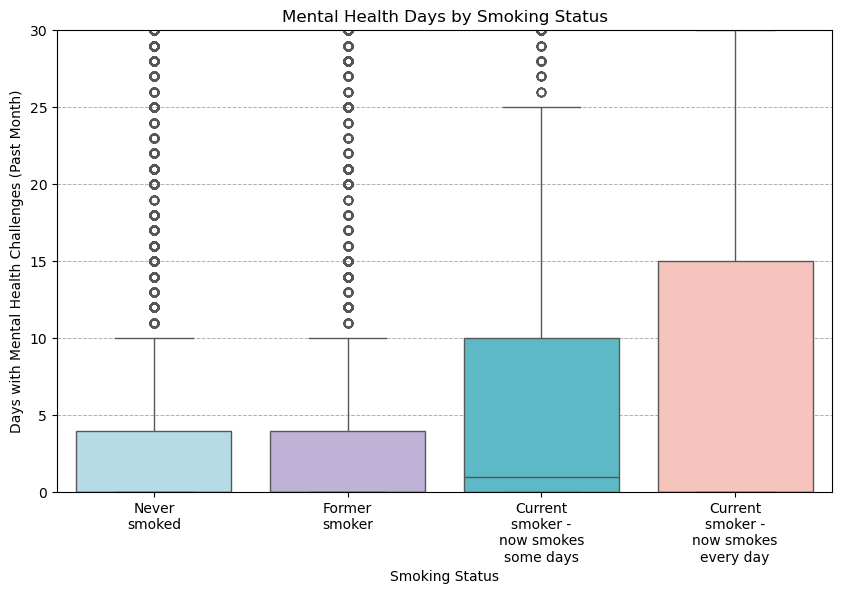

In [16]:
smoking_colors = ["#AFDFEE", "#BCACDD", "#4BC6D7", "#FFBDB4"]
order = ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days', 'Current smoker - now smokes every day']
wrapped_labels = [textwrap.fill(label, width=10) for label in order]
plt.figure(figsize=(10, 6))
sns.boxplot(x='_SMOKER3', y='MENTHLTH', data=EDA_data, palette=smoking_colors, order=order)
plt.ylim(0, 30)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.title('Mental Health Days by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Days with Mental Health Challenges (Past Month)')
plt.xticks(ticks=range(len(order)), labels=wrapped_labels)
plt.show()

**Why:** I wanted to plot these factors because I wanted to see the correlation between smoking and mental health. 
**How:** I plotted the self-reported bad mental health days per month with the self-reported smoking status

**Hypothesis:** I thought that there was a chance that the people who smoked would have better mental health because they have so much nicotine in their system, however, I also know that the withdrawals are not easy to deal with. I think that the factor I assumed to have the best self-reported mental health would be the people who never smoked though. 

**Results:** The people who reported that they did not smoke and the people who reported that they were former smokers had the best self-reported mental health. The people who only smoked some days had worse mental health with an average of 10 mental health challenges per month and those who were everyday smokers averaged at 15 bad mental health days per month. There were a lot of outliers so we can't say for sure that the correlation can be attributed to causation. This may also have some bias because these factors are self-reported, so we also have no guarantee that people shared correct or accurate information.

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_45237/3622208964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='INCOME3', y='MENTHLTH', data=EDA_data, order=income_order, palette=income_palette)


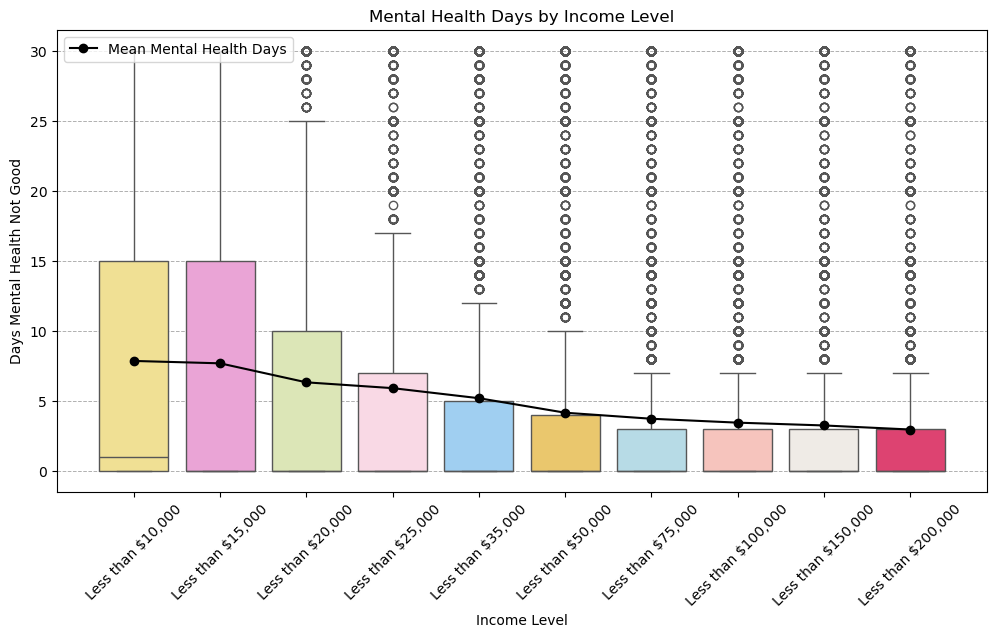

In [20]:
income_order = [ 'Less than $10,000', 'Less than $15,000', 'Less than $20,000', 'Less than $25,000', 'Less than $35,000', 'Less than $50,000', 'Less than $75,000', 'Less than $100,000', 'Less than $150,000', 'Less than $200,000', '$200,000 or more']
income_palette =  ["#FFEA85", "#F698DB", "#E1EEAF", "#FFD3E4", "#92D1FF", "#FFD058", "#AFDFEE",  "#FFBDB4",  "#F1EBE4",  "#F72967", "#BCACDD"]
income_means = EDA_data.groupby('INCOME3')['MENTHLTH'].mean().reindex(income_order)

plt.figure(figsize=(12, 6))
sns.boxplot(x='INCOME3', y='MENTHLTH', data=EDA_data, order=income_order, palette=income_palette)
plt.plot(range(len(income_order)), income_means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Mental Health Days by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Days Mental Health Not Good')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

**Why:** I wanted to plot these factors because I wanted to see the correlation between income levels and mental health. 
**How:** I plotted the self-reported bad mental health days per month with the self-reported imcome level

**Hypothesis:** I thought that the less that someone makes, the worse their mental health would be. However, I wanted to test to see if the data backed up the idea that "money doesnt buy happiness"

**Results:** The people who reported having made 0-15000 per year had the worst self reported mental health with an average of 15 bad mental health days per month. As the income levels went up, it seemed like the number of bad mental health datys went down. There were a lot of outliers so we can't say for sure that the correlation can be attributed to causation. This may also have some bias because these factors are self-reported, so we also have no guarantee that people shared correct or accurate information.

# ML and staistics

# Results and conclusion